In [1]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

#try:
#  %tensorflow_version 2.x  # Colab only.
#except Exception:
#  pass

import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
# 繼續匯入
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 載入數據
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# 建立模型
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [5]:
# 編譯模型
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 11ms/step - loss: 0.3354 - accuracy: 0.8929 - val_loss: 0.1097 - val_accuracy: 0.9660
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1023 - accuracy: 0.9693 - val_loss: 0.0872 - val_accuracy: 0.9731
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0720 - accuracy: 0.9784 - val_loss: 0.0774 - val_accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0540 - accuracy: 0.9829 - val_loss: 0.0632 - val_accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0447 - accuracy: 0.9863 - val_loss: 0.0620 - val_accuracy: 0.9815
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0378 - accuracy: 0.9882 - val_loss: 0.0556 - val_accuracy: 0.9824
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0422 -

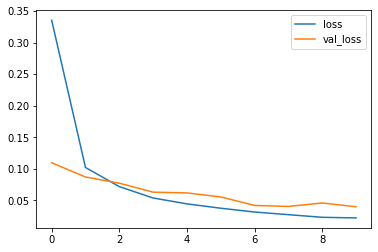

In [6]:
# 繪出迭代損失
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

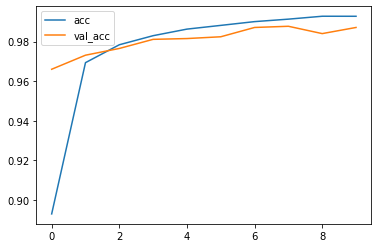

In [7]:
# 繪出迭代準確度
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 971    0    1    0    2    1    3    1    1    0]
 [   0 1133    0    0    1    0    0    1    0    0]
 [   2    1 1017    3    4    0    0    3    2    0]
 [   0    0    2  999    1    2    0    3    3    0]
 [   0    0    1    0  975    0    1    0    0    5]
 [   1    1    0    7    1  872    1    0    7    2]
 [   0    3    0    0    6    8  939    0    1    1]
 [   1    1    1    1   10    0    0 1011    1    2]
 [   0    2    3    2    0    4    0    1  958    4]
 [   0    0    1    1    3    1    0    6    1  996]]


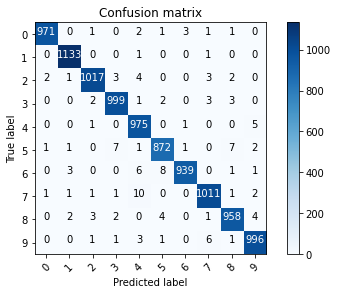

In [8]:
# 繪出混淆矩陣
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# 容易混淆的有 9 <--> 4, 9 <--> 7, 2 <--> 7, 等. 

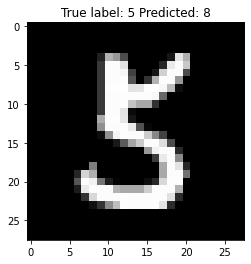

In [9]:
# 展現分類錯誤的例子
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));